In [5]:
# Dataset - Downloaded 3 years of daily prices via yfinance
# Used 5–10 assets from different sectors (e.g., AAPL, JPM, TSLA, AMZN, XOM)

import yfinance as yf
tickers = ['AAPL', 'JPM', 'TSLA', 'AMZN', 'XOM']
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")

/tmp/ipython-input-1470914423.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  5 of 5 completed


In [6]:
# Check whether data is loaded correctly
print(data)

Price            Close                                                 \
Ticker            AAPL        AMZN         JPM        TSLA        XOM   
Date                                                                    
2020-01-02   72.538521   94.900497  119.573372   28.684000  54.131069   
2020-01-03   71.833282   93.748497  117.995422   29.534000  53.695889   
2020-01-06   72.405670   95.143997  117.901604   30.102667  54.108166   
2020-01-07   72.065155   95.343002  115.897217   31.270666  53.665337   
2020-01-08   73.224396   94.598503  116.801331   32.809334  52.856068   
...                ...         ...         ...         ...        ...   
2023-12-22  191.974655  153.419998  160.106537  252.539993  95.891014   
2023-12-26  191.429306  153.410004  161.053391  256.609985  96.107422   
2023-12-27  191.528458  153.339996  162.019379  261.440002  95.655785   
2023-12-28  191.954865  153.380005  162.880188  253.179993  94.272591   
2023-12-29  190.913651  151.940002  162.688904  248

In [7]:
# Daily Returns
returns = data.pct_change().dropna()
print(returns)

Price          Close                                              High  \
Ticker          AAPL      AMZN       JPM      TSLA       XOM      AAPL   
Date                                                                     
2020-01-03 -0.009722 -0.012139 -0.013196  0.029633 -0.008039 -0.000067   
2020-01-06  0.007968  0.014886 -0.000795  0.019255  0.007678 -0.002063   
2020-01-07 -0.004703  0.002092 -0.017001  0.038801 -0.008184  0.003134   
2020-01-08  0.016086 -0.007809  0.007801  0.049205 -0.015080  0.011764   
2020-01-09  0.021241  0.004799  0.003651 -0.021945  0.007655  0.019676   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -0.005548 -0.002730 -0.000597 -0.007701  0.001769 -0.008474   
2023-12-26 -0.002841 -0.000065  0.005914  0.016116  0.002257 -0.007778   
2023-12-27  0.000518 -0.000456  0.005998  0.018822 -0.004699 -0.002011   
2023-12-28  0.002226  0.000261  0.005313 -0.031594 -0.014460  0.005995   
2023-12-29 -0.005424 -0.009388 -0.0011

In [9]:
# Daily VaR (99%)
var_99 = returns.quantile(0.01)

In [ ]:
# Actual Returns vs. Predicted VaR - Identify “breaches” where actual return < VaR threshold
breaches_99 = returns[returns < var_99]

In [22]:
# Backtesting Metrics - to check if the number of breaches is consistent with expected probability
import scipy.stats as stats
N = len(returns)
x = len(breaches_99)
p = 0.01  # 99% VaR
LR = -2 * (np.log(stats.binom.pmf(x, N, p)) - np.log(stats.binom.pmf(x, N, x/N)))
p_value = 1 - stats.chi2.cdf(LR, df=1)

/tmp/ipython-input-1596689924.py:6: RuntimeWarning: divide by zero encountered in log
  LR = -2 * (np.log(stats.binom.pmf(x, N, p)) - np.log(stats.binom.pmf(x, N, x/N)))


In [ ]:
# Identify Outliers / RNiV Factors
outliers = returns[returns < var_99]

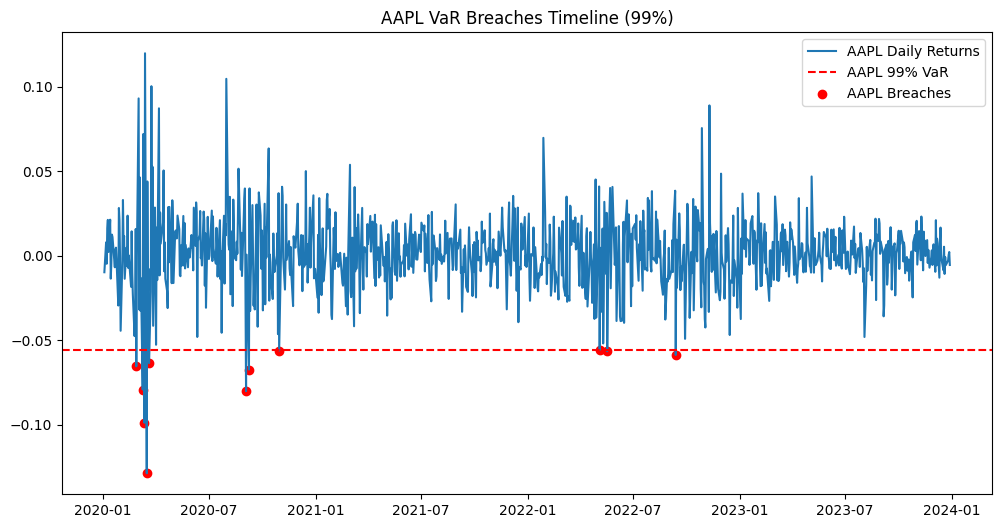

In [ ]:
# Visualize Exception Timeline - to highlight breach days in a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(returns[('Close', 'AAPL')], label='AAPL Daily Returns')
plt.axhline(var_99[('Close', 'AAPL')], color='r', linestyle='--', label='AAPL 99% VaR')
breaches_aapl = breaches_99[('Close', 'AAPL')].dropna()
plt.scatter(breaches_aapl.index, breaches_aapl, color='red', label='AAPL Breaches')
plt.title('AAPL VaR Breaches Timeline (99%)')
plt.legend()
plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

# Identify breaches
breaches = returns < var_99
num_breaches = breaches.sum()
total_obs = len(returns)
expected_prob = 0.01  # for 99% VaR

print(f"Total Observations: {total_obs}")
print(f"Number of breaches: {num_breaches}")
print(f"Expected breaches: {total_obs * expected_prob:.2f}")

Total Observations: 1005
Number of breaches: Price   Ticker
Close   AAPL      11
        AMZN      11
        JPM       11
        TSLA      11
        XOM       11
High    AAPL      11
        AMZN      11
        JPM       11
        TSLA      11
        XOM       11
Low     AAPL      11
        AMZN      11
        JPM       11
        TSLA      11
        XOM       11
Open    AAPL      11
        AMZN      11
        JPM       11
        TSLA      11
        XOM       11
Volume  AAPL      11
        AMZN      11
        JPM       11
        TSLA      11
        XOM       11
dtype: int64
Expected breaches: 10.05


In [10]:
cvar_99 = returns[returns < var_99].mean()
print("Conditional VaR (99%):")
print(cvar_99)

Conditional VaR (99%):
Price   Ticker
Close   AAPL     -0.073594
        AMZN     -0.079916
        JPM      -0.083129
        TSLA     -0.144387
        XOM      -0.082039
High    AAPL     -0.059835
        AMZN     -0.068549
        JPM      -0.073034
        TSLA     -0.120457
        XOM      -0.065717
Low     AAPL     -0.063654
        AMZN     -0.074819
        JPM      -0.075947
        TSLA     -0.124226
        XOM      -0.078510
Open    AAPL     -0.074155
        AMZN     -0.081043
        JPM      -0.079859
        TSLA     -0.144928
        XOM      -0.084033
Volume  AAPL     -0.520272
        AMZN     -0.573207
        JPM      -0.614988
        TSLA     -0.526357
        XOM      -0.597725
dtype: float64
